In [130]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

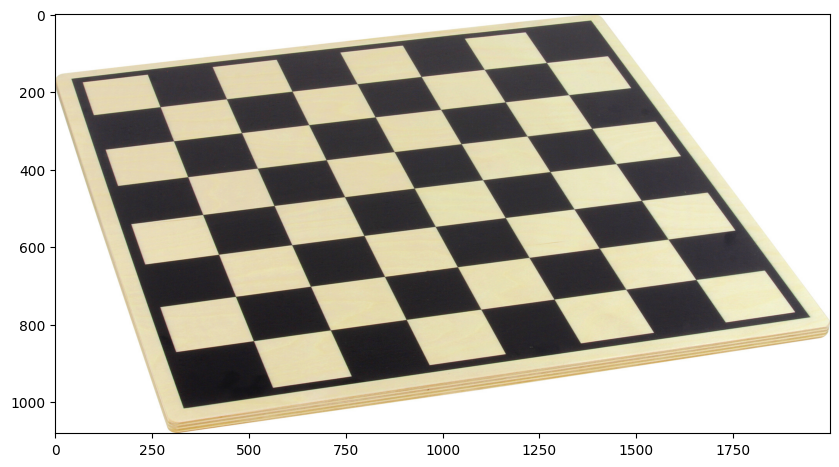

In [131]:
img = cv2.imread("checkboard-warped2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

[167  40]
[  15 1382]
[1019  332]
[ 780 1950]


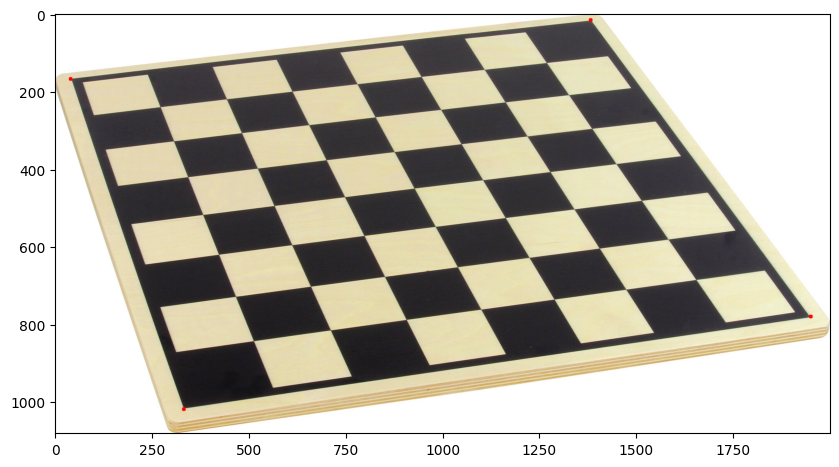

In [132]:
cornerness = cv2.cornerHarris(gray, blockSize=5, ksize=5, k=0.04)
threshold = 0.01 * cornerness.max()
corners = np.argwhere(cornerness > threshold)

img_copy = img.copy() 

left_top = min(corners, key=lambda c: c[1])
right_top = min(corners, key=lambda c: c[0])
left_bottom = max(corners, key=lambda c: c[0])
right_bottom = max(corners, key=lambda c: c[1])

print(left_top)
print(right_top)
print(left_bottom)
print(right_bottom)

cv2.circle(img_copy, (left_top[1], left_top[0]), 5, (255, 0, 0), -1)
cv2.circle(img_copy, (right_top[1], right_top[0]), 5, (255, 0, 0), -1)
cv2.circle(img_copy, (left_bottom[1], left_bottom[0]), 5, (255, 0, 0), -1)
cv2.circle(img_copy, (right_bottom[1], right_bottom[0]), 5, (255, 0, 0), -1)
plt.imshow(img_copy)



In [133]:
y0, x0 = left_top
y1, x1 = right_top
y2, x2 = left_bottom
y3, x3 = right_bottom

x_0, y_0 = (0, 0)
x_1, y_1 = (800, 0)
x_2, y_2 = (0, 800)
x_3, y_3 = (800, 800)

M = np.array(
    [
        [x0, y0, 1, 0, 0, 0, 0, 0, -x_0, 0, 0, 0],
        [0, 0, 0, x0, y0, 1, 0, 0, -y_0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, x0, y0, -1, 0, 0, 0],
        [x1, y1, 1, 0, 0, 0, 0, 0, 0, -x_1, 0, 0],
        [0, 0, 0, x1, y1, 1, 0, 0, 0, -y_1, 0, 0],
        [0, 0, 0, 0, 0, 0, x1, y1, 0, -1, 0, 0],
        [x2, y2, 1, 0, 0, 0, 0, 0, 0, 0, -x_2, 0],
        [0, 0, 0, x2, y2, 1, 0, 0, 0, 0, -y_2, 0],
        [0, 0, 0, 0, 0, 0, x2, y2, 0, 0, -1, 0],
        [x3, y3, 1, 0, 0, 0, 0, 0, 0, 0, 0, -x_3],
        [0, 0, 0, x3, y3, 1, 0, 0, 0, 0, 0, -y_3],
        [0, 0, 0, 0, 0, 0, x3, y3, 0, 0, 0, -1],
    ]
)
V = np.array([0, 0, -1, 0, 0, -1, 0, 0, -1, 0, 0, -1])
H_vector = np.linalg.solve(M, V)
H = np.array(
    [
        [H_vector[0], H_vector[1], H_vector[2]],
        [H_vector[3], H_vector[4], H_vector[5]],
        [H_vector[6], H_vector[7], 1],
    ]
)
H

array([[ 5.70458369e-01, -1.95509206e-01,  9.83170269e+00],
       [ 1.32437746e-01,  1.16928588e+00, -2.00568253e+02],
       [-7.42978425e-06,  2.90575008e-04,  1.00000000e+00]])

(<Axes: >, <matplotlib.image.AxesImage at 0x7f7cb9427fa0>)

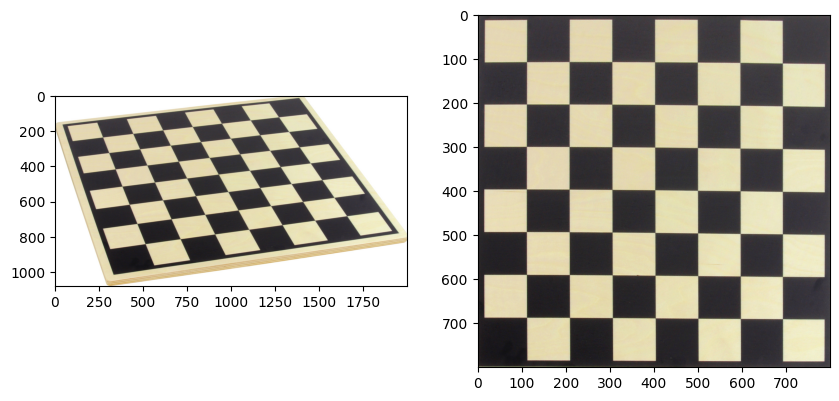

In [134]:
warped_img = cv2.warpPerspective(img, H, (800, 800))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(warped_img)

In [149]:
M = np.array(
    [[1 / 14, 2 / 14, 3 / 14], [2 / 14, 4 / 14, 6 / 14], [3 / 14, 6 / 14, 9 / 14]]
)
V_proj = M @ np.array([2, 3, 6])
V_proj

array([1.85714286, 3.71428571, 5.57142857])

In [151]:
M = np.array([[1]])
V = np.array([1.8571])
print(np.linalg.solve(M, V))
M = np.array([[2]])
V = np.array([3.71428571])
print(np.linalg.solve(M, V))
M = np.array([[3]])
V = np.array([5.57142857])
print(np.linalg.solve(M, V))


[1.8571]
[1.85714285]
[1.85714286]
